<a href="https://colab.research.google.com/github/MAFINPY29/Laboratory-Experiments--Physics-3/blob/main/Experiment-2-Capacitor/Exp2-Capacitor-Charging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 2: Capacitor Charging

This notebook analyzes experimental charge-voltage data from a parallel-plate capacitor to estimate its capacitance for two different plate separations using data analysis techniques.


## Data Loading and Preparation

The experimental data are loaded from an Excel file.
For each voltage value, the electric charge was measured three times. The mean charge is computed to reduce random experimental fluctuations.


## Physical Model

The relationship between electric charge and voltage in a capacitor is given by:

$$ Q = C\ V$$

This expression predicts a linear dependence between charge and voltage, where the capacitance corresponds to the slope of the linear fit.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
df = pd.read_excel("datalab2.xlsx")
df

,Voltage,Q1_A,Q2_A,Q3_A,QA,Q1_B,Q2_B,Q3_B,QB
0,50,0.587,0.623,0.676,0.628667,0.391,0.400,0.38,0.390333
1,100,1.180,1.170,1.400,1.250000,0.795,0.783,0.80,0.792667
2,200,2.700,2.340,2.400,2.480000,1.600,1.500,1.56,1.553333
3,300,3.520,3.600,3.450,3.523333,2.720,2.340,2.50,2.520000


In [25]:
# Procesamiento de datos
voltaje = df["Voltage"].values

QA_medidas = df[["Q1_A", "Q2_A", "Q3_A"]].values
QB_medidas = df[["Q1_B", "Q2_B", "Q3_B"]].values

QA = QA_medidas.mean(axis=1)
QB = QB_medidas.mean(axis=1)

err_QA = QA_medidas.std(axis=1, ddof=1) / np.sqrt(3)
err_QB = QB_medidas.std(axis=1, ddof=1) / np.sqrt(3)


## Linear Regression

A linear regression is applied to the averaged charge–voltage data.
The fitting model has the form:
$$Q(V) = mV + b$$

The slope ($m$) represents the capacitance of the capacitor for each plate separation.


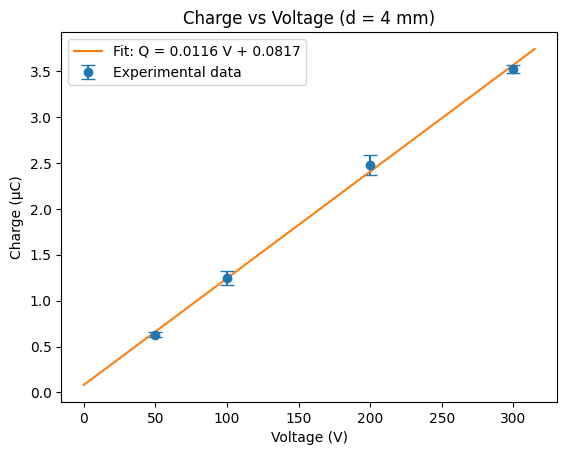

In [26]:
# Linear fit and plots -> QA vs Voltage
coef_QA, cov_QA = np.polyfit(voltaje, QA, 1, cov=True)
m_A, b_A = coef_QA
err_m_A = np.sqrt(cov_QA[0,0])

V_fit = np.linspace(0, max(voltaje)*1.05, 100)
Q_fit_A = np.polyval(coef_QA, V_fit)

plt.figure()
plt.errorbar(voltaje, QA, yerr=err_QA, fmt='o', capsize=5, label="Experimental data")
plt.plot(V_fit, Q_fit_A, label=f"Fit: Q = {m_A:.4f} V + {b_A:.4f}")
plt.xlabel("Voltage (V)")
plt.ylabel("Charge (μC)")
plt.title("Charge vs Voltage (d = 4 mm)")
plt.legend()
plt.show()



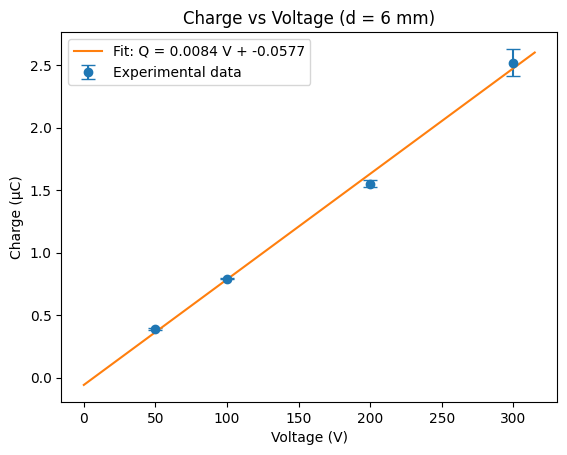

In [27]:
# Linear fit and plots -> QB vs Voltage
coef_QB, cov_QB = np.polyfit(voltaje, QB, 1, cov=True)
m_B, b_B = coef_QB
err_m_B = np.sqrt(cov_QB[0,0])

Q_fit_B = np.polyval(coef_QB, V_fit)

plt.figure()
plt.errorbar(voltaje, QB, yerr=err_QB, fmt='o', capsize=5, label="Experimental data")
plt.plot(V_fit, Q_fit_B, label=f"Fit: Q = {m_B:.4f} V + {b_B:.4f}")
plt.xlabel("Voltage (V)")
plt.ylabel("Charge (μC)")
plt.title("Charge vs Voltage (d = 6 mm)")
plt.legend()
plt.show()




## Residual Analysis

Residuals are defined as the difference between the measured charge values
and the values predicted by the linear model.

Residual analysis allows the evaluation of the quality of the fit
and helps identify possible systematic deviations.


In [28]:
R1 = QA - np.polyval(coef_QA, voltaje)
print(R1)
R2 = QB - np.polyval(coef_QB, voltaje)
print(R2)



[-0.03421469  0.0059548   0.07362712 -0.04536723]
[ 0.0259661   0.00620339 -0.07732203  0.04515254]


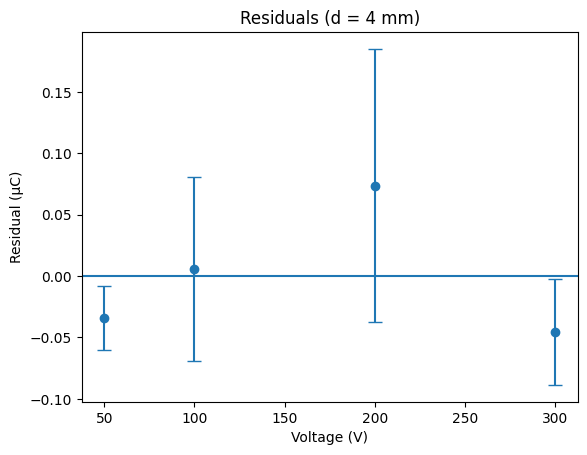

In [29]:
plt.figure()
plt.errorbar(voltaje, R1, yerr=err_QA, fmt='o', capsize=5)
plt.axhline(0)
plt.title("Residuals (d = 4 mm)")
plt.xlabel("Voltage (V)")
plt.ylabel("Residual (μC)")
plt.show()


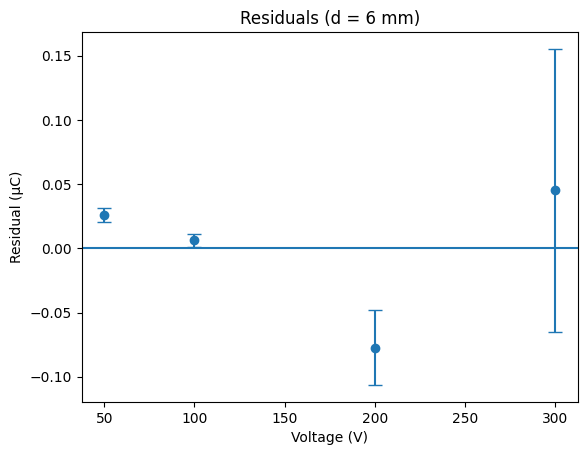

In [30]:
plt.figure()
plt.errorbar(voltaje, R2, yerr=err_QB, fmt='o', capsize=5)
plt.axhline(0)
plt.title("Residuals (d = 6 mm)")
plt.xlabel("Voltage (V)")
plt.ylabel("Residual (μC)")
plt.show()


In [31]:
# Final results
print(f"C1 (4 mm) = {m_A:.5f} ± {err_m_A:.5f}")
print(f"C2 (6 mm) = {m_B:.5f} ± {err_m_B:.5f}")


C1 (4 mm) = 0.01162 ± 0.00034
C2 (6 mm) = 0.00844 ± 0.00034


## Final Interpretation

The capacitance obtained for the smaller plate separation is larger than that
for the larger separation, as expected from electrostatic theory.

The results demonstrate how experimental physics data can be analyzed
using basic data science techniques.
